In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
data=pd.read_csv('cheese.csv')
data.head()
data.tail()
data.info()
data.shape

,RETAILER,VOLUME,DISP,PRICE
0,LOS ANGELES - LUCKY,21374,0.162000,2.578460
1,LOS ANGELES - RALPHS,6427,0.124113,3.727867
2,LOS ANGELES - VONS,17302,0.102000,2.711421
3,CHICAGO - DOMINICK,13561,0.027591,2.651206
4,CHICAGO - JEWEL,42774,0.090613,1.986674


,RETAILER,VOLUME,DISP,PRICE
5550,SYRACUSE - WEGMANS,751,0.280321,3.338216
5551,NEW ENGLAND (NORTH) - SHOP N SAVE,5031,0.094000,2.379845
5552,BIRMINGHAM/MONTGOM - KROGER,1400,0.000000,2.654286
5553,NEW YORK (NEW) - A & P,3448,0.043846,3.524942
5554,ROANOKE (NEW) - KROGER CO,3791,0.009648,2.466631


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 4 columns):
RETAILER    5555 non-null object
VOLUME      5555 non-null int64
DISP        5555 non-null float64
PRICE       5555 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 173.7+ KB


(5555, 4)

In [3]:
data_pivot=pd.pivot_table(data,values=['VOLUME','DISP','PRICE'],index='RETAILER',aggfunc=np.median)
data_pivot.head()
data_pivot.shape

,DISP,PRICE,VOLUME
RETAILER,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0


(88, 3)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(data_pivot)
data_scld=pd.DataFrame(arr_scld, columns=data_pivot.columns)
data_scld.head()
data_scld.describe()
data_scld.shape
import warnings
warnings.filterwarnings('ignore')

,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


,DISP,PRICE,VOLUME
count,88.000000,88.000000,88.000000
mean,0.201006,0.337239,0.252149
std,0.234245,0.214843,0.204063
min,0.000000,0.000000,0.000000
25%,0.000000,0.173638,0.105704
50%,0.099057,0.254668,0.217822
75%,0.343301,0.456079,0.326105
max,1.000000,1.000000,1.000000


(88, 3)

In [5]:
from sklearn.cluster import KMeans
num_of_clusters = range(2,10)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(data_scld)
    error.append(clusters.inertia_/100)
    
data=pd.DataFrame({'Cluster':num_of_clusters,'Error_Term':error})
data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster,Error_Term
0,2,0.087082
1,3,0.063325
2,4,0.044077
3,5,0.036290
4,6,0.030697
5,7,0.027051
6,8,0.022889
7,9,0.020014


<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Find the optimal number of Cluster')

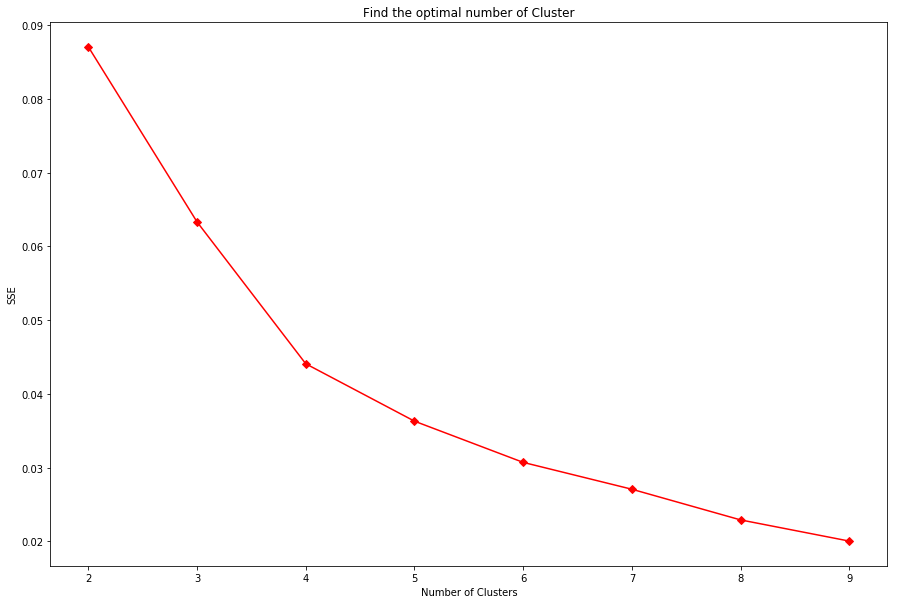

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(data.Cluster,data.Error_Term,marker = "D",color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of Cluster')
plt.show()

In [7]:
cluster=KMeans(8)
cluster.fit(data_scld)
clusters.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([8, 2, 2, 6, 6, 6, 0, 2, 2, 2, 8, 2, 1, 1, 3, 2, 2, 3, 0, 4, 2, 7,
       2, 2, 2, 8, 2, 1, 3, 1, 2, 2, 3, 8, 7, 1, 3, 3, 8, 2, 2, 4, 0, 1,
       2, 3, 7, 7, 8, 3, 0, 2, 6, 6, 6, 3, 2, 2, 2, 1, 8, 5, 5, 1, 2, 2,
       2, 2, 2, 2, 5, 5, 4, 0, 5, 1, 0, 2, 3, 1, 7, 1, 8, 5, 2, 2, 2, 8])

In [8]:
data_pivot['Cluster']=cluster.labels_
data_pivot.head()
data_pivot.tail()
data_pivot.info()
data_pivot.shape

,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0,3
ATLANTA - KROGER CO,0.030872,2.701700,4455.0,1
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0,3
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0,7
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0,7


,DISP,PRICE,VOLUME,Cluster
RETAILER,,,,
SYRACUSE - WEGMANS,0.227423,3.459383,807.0,2
TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0,3
TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0,1
TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0,1
WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5,4


<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, ALBANY,NY - PRICE CHOPPER to WICHITA - DILLON COMPANIES
Data columns (total 4 columns):
DISP       88 non-null float64
PRICE      88 non-null float64
VOLUME     88 non-null float64
Cluster    88 non-null int32
dtypes: float64(3), int32(1)
memory usage: 3.1+ KB


(88, 4)

In [9]:
clust_profile=pd.pivot_table(data_pivot,values=['VOLUME','DISP','PRICE'],index='Cluster',aggfunc=np.mean)
np.round(clust_profile,2)
data_pivot.groupby("Cluster").size()

,DISP,PRICE,VOLUME
Cluster,,,
0,0.25,2.68,7207.58
1,0.04,2.61,5574.94
2,0.29,3.35,1459.08
3,0.02,2.62,2539.07
4,0.05,3.30,2619.10
5,0.08,2.93,12931.50
6,0.18,2.45,2600.45
7,0.03,4.01,3896.88


Cluster
0     6
1    17
2     6
3    22
4    15
5     4
6    10
7     8
dtype: int64